In [1]:
import numpy as np 
import pandas as pd # data processing,
# for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
# to give the graphs a little bit of aesthetics and size the graphs
sns.despine() 

plt.rc('figure', figsize=(20,10)) 

# extending the number of viewable columns
pd.options.display.max_columns = 30

C:\Users\abiso\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\abiso\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<Figure size 432x288 with 0 Axes>

In [2]:
data=pd.read_csv('energydata_complete.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
dat =  data.copy()

In [5]:
dat = dat.drop(['date','lights'], axis=1)

In [6]:
#Splitting the data into target and explanatory variables 
dat1=dat["T2"]
target = dat["T6"]

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# normalizing the features
normalized_features = pd.DataFrame(scaler.fit_transform(dat), columns=dat.columns)

# splitting data into features(independent) and target(dependent) variables

# predictors
features = normalized_features["T2"]

# target variable
targets = normalized_features["T6"]


# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)

        

In [8]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [57]:
# Let's use the handy function we created
def adj_r2(X,Y,model):
    r2 = model.score(X,Y)
    n = X.shape[0]
    k = X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-k-1)
    return adjusted_r2

In [41]:
x_train= np.array(x_train)

array([[0.12284953],
       [0.18899927],
       [0.0574267 ],
       ...,
       [0.15265326],
       [0.31504725],
       [0.27550279]])

In [44]:

    # Fitting the model
    from sklearn.linear_model import LinearRegression
    # Create a linear regression object
    reg = LinearRegression()
    # Fit the regression with the scaled TRAIN inputs and targets
    reg.fit(x_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train.reshape(-1,1))




# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)
# Create a regression summary where we can compare them with one-another

print(reg.coef_)

# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(np.array(x_test).reshape(-1,1))
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph




# Find the R-squared of the model
print("The Model Accuracy Metrics")
print("---------------------------")
print('Train R-Squared: {} '.format(reg.score(x_train.reshape(-1,1),y_train)))
print('Test R-Squared: {} '.format(reg.score(np.array(x_test).reshape(-1,1),y_test)))

print("The Train Adjusted R-Squared is {}".format(adj_r2(x_train.reshape(-1,1),y_train,reg)))
print("The Test Adjusted R-Squared is {}".format(adj_r2(np.array(x_test).reshape(-1,1),y_test,reg)))


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error: {}".format(mae))

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error((y_test), (y_hat_test)))
mse = mean_squared_error((y_test), (y_hat_test))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mse))


[0.8910771]
The Model Accuracy Metrics
---------------------------
Train R-Squared: 0.6415148739809167 
Test R-Squared: 0.6427789637197382 
The Train Adjusted R-Squared is 0.6414889193671012
The Test Adjusted R-Squared is 0.6427186121339501
Mean Absolute Error: 0.08216970202681717
Root Mean Squared Error: 0.10567064851347532
Mean Squared Error: 0.011166285957258446


In [60]:
import numpy as np
rss = np.sum(np.square(y_test - y_hat_test))
round(rss, 3)

66.116

In [61]:
def split_logtrans(data, log_tran=False, splitratio=0.3, randomState=42):
    
    
    from sklearn.preprocessing import MinMaxScaler
    
    dat1 = data.copy()
   
    if log_tran == False:
            
        scaler = MinMaxScaler()

        # normalizing the features
        normalized_features = pd.DataFrame(scaler.fit_transform(dat1), columns=dat1.columns)

        # splitting data into features(independent) and target(dependent) variables

        # predictors
        features = normalized_features.drop(['Appliances'], axis=1)

        # target variable
        targets = normalized_features['Appliances']
        
    else:
        log_app = np.log(dat1['Appliances'])
        # Then we add it to our data frame
        dat1['Appliances'] = log_app

        targets = dat1['Appliances']
        # The inputs are everything BUT the dependent variable, so we can simply drop it
        inputs = dat1.drop(['Appliances'],axis=1)

        # Create a scaler object
        scaler = MinMaxScaler()
        # Fit the inputs (calculate the mean and standard deviation feature-wise)
        scaler.fit(inputs)
        # Scale the features and store them in a new variable (the actual scaling procedure)
        features = scaler.transform(inputs)
        
    # Import the module for the split
    from sklearn.model_selection import train_test_split

    # Split the variables with an 80-20 split and some random state
    # To have the same split as mine, use random_state = 365
    x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=splitratio, random_state=randomState)
    
    return x_train, x_test, y_train, y_test

In [67]:
def mult_reg(data,log_t=False):
    """
    Description: This function will generates a Linear Regression using the data available with a transformation of the 
                 target variable. 
                 It also produces a distribution and regression plot of the residuals of the model with the accuracy of the models.
    
    
    """
    
    x_train, x_test, y_train, y_test = split_logtrans(data, log_tran=log_t, splitratio=0.3, randomState=42)
    
    # Create a linear regression object
    reg = LinearRegression()
    # Fit the regression with the scaled TRAIN inputs and targets
    reg.fit(x_train,y_train)
    
    # Let's check the outputs of the regression
    # I'll store them in y_hat as this is the 'theoretical' name of the predictions
    y_hat = reg.predict(x_train)
    
    
   
   
    # Note that this is NOT the adjusted R-squared
    # in other words... find the Adjusted R-squared to have the appropriate measure :)
    # Create a regression summary where we can compare them with one-another
    reg_summary = pd.DataFrame(data.drop(['Appliances'], axis=1).columns.values, columns=['Features'])
    reg_summary['Weights'] = reg.coef_
    print(reg_summary)
    
    # Once we have trained and fine-tuned our model, we can proceed to testing it
    # Testing is done on a dataset that the algorithm has never seen
    # Luckily we have prepared such a dataset
    # Our test inputs are 'x_test', while the outputs: 'y_test' 
    # We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
    # If the predictions are far off, we will know that our model overfitted
    y_hat_test = reg.predict(x_test)
    # Create a scatter plot with the test targets and the test predictions
    # You can include the argument 'alpha' which will introduce opacity to the graph
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(reg, x_test,y_test)
    # Plotting the actual vs predicted values
    if log_t==False:
        print("                           "+"Multiple Linear Regression"+"                    ")
        print("                           "+"---------------------------"+"                    ")
    else: 
        print("Multiple Linear Regression with a Log Transformation of the Target Variable ")
        print("----------------------------------------------------------------------------")
        
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    import numpy as np
    
    # Zooming  into the Graph - to get a clearer view of the predicted values
    plt.scatter(y_test, y_hat_test, alpha=0.2)
    plt.xlabel('Actual',size=18)
    plt.ylabel('Predictions',size=18)
    plt.show()
    # In the best case scenario this plot should be normally distributed
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    

    # Find the R-squared of the model
    print("The Model Accuracy Metrics")
    print("---------------------------")
    print('Train R-Squared: {} '.format(reg.score(x_train,y_train)))
    print('Test R-Squared: {} '.format(reg.score(x_test,y_test)))
          
    print("The Train Adjusted R-Squared is {}".format(adj_r2(x_train,y_train,reg)))
    print("The Test Adjusted R-Squared is {}".format(adj_r2(x_test,y_test,reg)))
    
    
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_test, y_hat_test)
    print("Mean Absolute Error: {}".format(mae))

    from sklearn.metrics import  mean_squared_error
    rmse = np.sqrt(mean_squared_error((y_test), (y_hat_test)))
    mse = mean_squared_error((y_test), (y_hat_test))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean Squared Error: {}".format(mse))
    import numpy as np
    rss = np.sum(np.square(y_test - y_hat_test))
    print(round(rss, 3))
    
    

       Features   Weights
0            T1 -0.003281
1          RH_1  0.553547
2            T2 -0.236178
3          RH_2 -0.456698
4            T3  0.290627
5          RH_3  0.096048
6            T4  0.028981
7          RH_4  0.026386
8            T5 -0.015657
9          RH_5  0.016006
10           T6  0.236425
11         RH_6  0.038049
12           T7  0.010319
13         RH_7 -0.044614
14           T8  0.101995
15         RH_8 -0.157595
16           T9 -0.189941
17         RH_9 -0.039800
18        T_out -0.321860
19  Press_mm_hg  0.006839
20       RH_out -0.077671
21    Windspeed  0.029183
22   Visibility  0.012307
23    Tdewpoint  0.117758
24          rv1  0.000770
25          rv2  0.000770
                           Multiple Linear Regression                    
                           ---------------------------                    


C:\Users\abiso\Anaconda\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


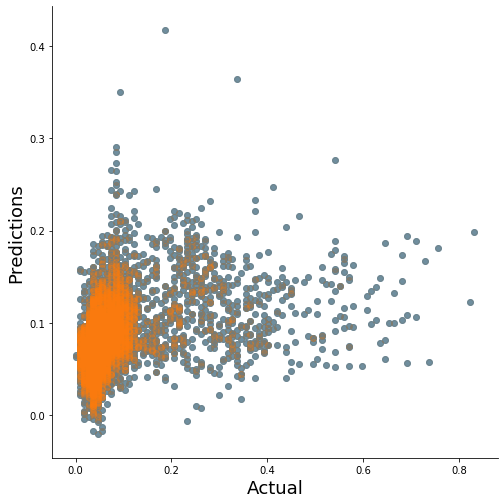

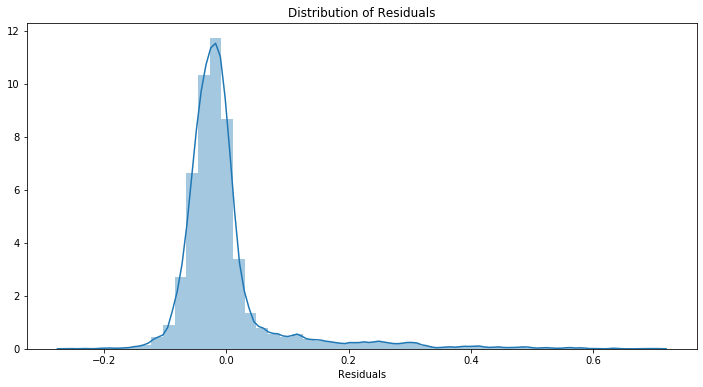

The Model Accuracy Metrics
---------------------------
Train R-Squared: 0.14471942308518737 
Test R-Squared: 0.14890246319303513 
The Train Adjusted R-Squared is 0.14310650548166337
The Test Adjusted R-Squared is 0.14514804582673357
Mean Absolute Error: 0.05013362397742957
Root Mean Squared Error: 0.08751444947661711
Mean Squared Error: 0.00765877886719537
45.348


In [68]:
mult_reg(dat,log_t=False)